<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member1: Laura TESTA
<br>Group member2: Alice ALBRECHT
<br>Group member3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

In [14]:
# imports
import os
import neurom as nm
from neurom import view
import matplotlib.pyplot as plt
from neuron import h
from hoc2swc import neuron2swc
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)
from neurom import viewer
from neurom.check.runner import CheckRunner

In [9]:
# Defining the sections
soma = h.Section(name="soma")
first_dend = h.Section(name="first_dend")
sec_dend = h.Section(name="sec_dend")
axon = h.Section(name="axon")
first_branch = h.Section(name="first_branch")
second_branch = h.Section(name="second_branch")
third_branch = h.Section(name="third_branch")

# Geometry
soma.L = soma.diam = 15
first_dend.L = 100
first_dend.diam=5
sec_dend.L=100
sec_dend.diam = 5
axon.L = 200
axon.diam = 7
first_branch.L = 50
first_branch.diam = 3
second_branch.L = 50
second_branch.diam = 3
third_branch.L = 50
third_branch.diam = 3

# Topology
axon.connect(soma(0))
first_dend.connect(soma(1))
sec_dend.connect(soma(1))
first_branch.connect(first_dend(1))
second_branch.connect(first_dend(1))
third_branch.connect(first_dend(1))
h.topology()  # Check the topology


|-|       soma(0-1)
   `|       first_dend(0-1)
     `|       first_branch(0-1)
     `|       second_branch(0-1)
     `|       third_branch(0-1)
   `|       sec_dend(0-1)
 `|       axon(0-1)



1.0

Wrote cell 0 to cell_01hw.swc


cell_01hw.swc:7:warning

cell_01hw.swc:10:warning



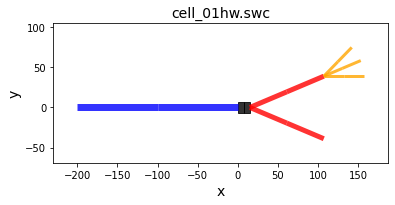

In [10]:
# Visualize in Noto
neuron2swc('cell_01hw.swc', swap_yz=False) 
neuron = nm.load_morphology('cell_01hw.swc')
view.plot_morph(neuron);

# <font color= 'red'>Ex1:</font> Visualizing neurons

<font size ="3"> Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. 
    
    
<font size ="3">Select one of the neurons from your group data set. Write code that generates two plots:
    
    1. Visualize the neuron oriented in the three possible planes (xy, xz, yz). 
    2. Visualize each of the neurites odf your morphoology(in a single plane).

<font size ="3"> For each visualization plot everything in a single plot (use subplots). Make sure to title the figure with cell name and the subplots with respective title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. <font color= 'red'>[1.5 pts]

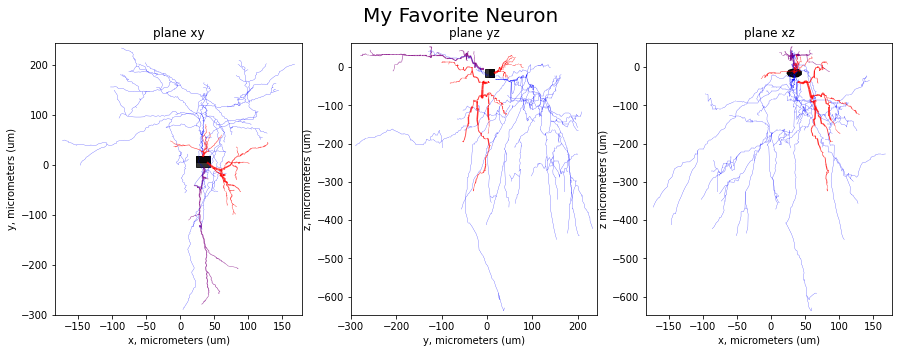

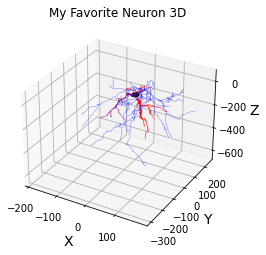

In [19]:
# selection of one of the neuron from the group 3
neuron_10 = nm.load_morphology('data/morph_10.swc')

# plot neuron in different planes
planes = ['xy', 'yz', 'xz']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, plane in enumerate(planes):
    view.plot_morph(neuron_10 , plane=plane, ax=ax[i])
    update_plot_limits(
        ax[i], white_space=10
    )  # set your x, y plot limits to match with your neuron

    # the axis handler is returend for further customization
    ax[i].set_title("plane "+plane)
    
fig.suptitle('My Favorite Neuron', fontsize=20);
    
ax[0].set_xlabel("x, micrometers (um)")
ax[0].set_ylabel("y, micrometers (um)")
ax[1].set_xlabel("y, micrometers (um)")
ax[1].set_ylabel("z, micrometers (um)")
ax[2].set_xlabel("x, micrometers (um)")
ax[2].set_ylabel("z micrometers (um)");

viewer.draw(neuron_10, mode='3d')  
plt.title('My Favorite Neuron 3D');


In [ ]:
# plot neurites
neurites = neuron_10.neurites
# Plot each of the neurites separately
N = len(neurites)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.plot_tree(neurite, ax=axes[i], plane="xy") #here choose 'xy' plane because it seems tobe the most appropriate one
    update_plot_limits(axes[i], white_space=10)

    # remove the title for each subplot
    axes[i].set_title("neurite"+str(i+1))

# set a global title for the figure
fig.suptitle(neuron.name, fontsize=20);

# <font color= 'red'>Ex2:</font> Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. <font color= 'red'>[2 pts]

In [14]:
# the structural checks concern the valid structure of a morphology
config = {
    "checks": {
        "morphology_checks": [
            "has_axon",
            "has_basal_dendrite",
            "has_apical_dendrite",
            "has_no_jumps",
            "has_no_fat_ends",
            "has_nonzero_soma_radius",
            "has_all_nonzero_neurite_radii",
            "has_all_nonzero_section_lengths",
            "has_all_nonzero_segment_lengths",
            "has_no_flat_neurites",
            "has_nonzero_soma_radius",
            "has_no_root_node_jumps",
            "has_no_narrow_start",
            "has_no_dangling_branch",
        ]
    },
    "options": {
        "has_nonzero_soma_radius": 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    },
}

# create a CheckRunner object by providing the configuration dict
check_runner = CheckRunner(config)

In [20]:
path = "data/"
for file in os.listdir(path):
    # run on a directory or a morphology
    results = check_runner.run(path + file)

    for morph in results["files"]:

        print("Morphology: {} \n".format(morph))

        checks_dict = results["files"][morph]

        # empty strings for our results
        passed = ""
        failed = ""

        # iterate over dictionary's items
        for check_name, status in checks_dict.items():

            # the string with the check's name and status
            string = "\t{0: <50} : {1}\n".format(check_name, status)

            # separate passed from failed checks
            if status is True:
                passed += string  # concatenates to the current passed string

            else:
                failed += string  # concatenats to the current failed string

        print(passed)
        print(failed)

                Has apical dendrite FAIL
             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
               Has no flat neurites FAIL
                                ALL FAIL
                       Has no jumps FAIL
                                ALL FAIL


Morphology: data/morph_05.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has apical dendrite                                : False
	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_07.swc 

	Has axon                                           : True
	Has basal dendrite                           

                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/.ipynb_checkpoints/morph_01-checkpoint.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no root node jumps                             : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no jumps                                       : False
	ALL                                                : False

Morphology: data/.ipynb_checkpoints/morph_10-checkpoint.swc 

	Has axon                                     

             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
               Has no flat neurites FAIL
                Has no narrow start FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/morph_09.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_08.swc 

	Has axon                                           : True
	Has basal dendrite                            

             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/morph_06.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_10.swc 

	Has axon                                           : True
	Has basal dendrite                            

                Has apical dendrite FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
             Has no root node jumps FAIL
                Has no narrow start FAIL
             Has no dangling branch FAIL
                                ALL FAIL


Morphology: data/morph_04.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True

	Has apical dendrite                                : False
	Has no jumps                                       : False
	Has no fat ends                                    : False
	Has no root node jumps                             : False
	Has no narrow start                                : False
	Has no dangling branch                             : False
	ALL                                                : False



                Has apical dendrite FAIL
               Has no flat neurites FAIL
             Has no root node jumps FAIL
                                ALL FAIL
                       Has no jumps FAIL
                                ALL FAIL


Morphology: data/morph_03.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has apical dendrite                                : False
	Has no flat neurites                               : False
	Has no root node jumps                             : False
	ALL                                                : False

Morphology: data/morph_01.swc 

	Has axon                                           : True
	Has basal dendrite                          

             Has no root node jumps FAIL
                                ALL FAIL


Morphology: data/morph_02.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False



In [44]:
### CHECKER UN NEURON A LA FOIS POUR VOIR LES MIEUX
results = check_runner.run('data/morph_09.swc') #juste changer le numero

for morph in results["files"]:

    print("Morphology: {} \n".format(morph))

    checks_dict = results["files"][morph]

    # empty strings for our results
    passed = ""
    failed = ""

    # iterate over dictionary's items
    for check_name, status in checks_dict.items():

        # the string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)

        # separate passed from failed checks
        if status is True:
            passed += string  # concatenates to the current passed string

        else:
            failed += string  # concatenats to the current failed string

    print(passed)
    print(failed)

             Has no root node jumps FAIL
                                ALL FAIL


Morphology: data/morph_09.swc 

	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True
	Has no flat neurites                               : True
	Has no narrow start                                : True
	Has no dangling branch                             : True

	Has no root node jumps                             : False
	ALL                                                : False



# <font color= 'red'>Ex3:</font> Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Find the morphometric charachteristics that best enable you to classify the cells into different groups, such as:

    section_lengths, soma_volume, neurite_volume_density, ...

Plot the results for each metric in a histogram. Do you see any differences? If yes, explain them. Would using a combination of morphometric characteristics improve the classification?  <font color= 'red'>[2.5 pts]

#### OK ALORS MDRR ON A AUCUN NEURON COMPLETEMENT CORRECT DONC BON... Je pense certain 'FAIL' SONT PAS GRAVE DONC GO REGARDER MIEUX LES PAPERS POUR COMPRENDRE LES DIFFERENTES ERREURS

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex2 and Ex3.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://academic.oup.com/cercor/article/29/4/1719/5304727)

In [46]:
# Create a list of "correct cells"
correct_cells = ['morph_07.swc', 'morph_09.swc'] # this is an exemple we need ot read the papers to know better

In [74]:
for cell in correct_cells:
    neuron = nm.load_morphology("data/" + cell)
    
    # Extract section_lengths
    section_lengths = nm.get("section_lengths", neuron)

    # Extract soma_volume
    soma_volume = nm.get("section_lengths", neuron, neurite_type=nm.NeuriteType.axon)
    
    # Extract neurite_volume_density
    neurite_volume_density = nm.get("section_lengths", neuron, neurite_type=nm.NeuriteType.axon)
  
    print("Neuron Name:", neuron.name, "\n")      
    print("Section lengths:", section_lengths[:10], "\n") 
    print("Soma volume:", soma_volume[:10], "\n")
    print("Neurite volume Density:", neurite_volume_density[:10])
    print('---------------------- \n')

Neuron Name: morph_07.swc 

Section lengths: [5.4633985, 50.482502, 21.859787, 154.22867, 7.527884, 167.57753, 2.1148512, 5.2421117, 333.8457, 143.1206] 

Soma volume: [154.22867, 7.527884, 167.57753, 2.1148512, 5.2421117, 333.8457, 143.1206, 2.4336617, 262.6865, 18.638042] 

Neurite volume Density: [154.22867, 7.527884, 167.57753, 2.1148512, 5.2421117, 333.8457, 143.1206, 2.4336617, 262.6865, 18.638042]
---------------------- 

Neuron Name: morph_09.swc 

Section lengths: [126.5774, 19.778261, 16.957382, 58.238857, 214.26219, 103.59114, 308.7279, 321.1171, 5.932291, 497.25504] 

Soma volume: [126.5774, 19.778261, 16.957382, 58.238857, 214.26219, 103.59114, 308.7279, 321.1171, 5.932291, 497.25504] 

Neurite volume Density: [126.5774, 19.778261, 16.957382, 58.238857, 214.26219, 103.59114, 308.7279, 321.1171, 5.932291, 497.25504]
---------------------- 



In [101]:
def hist_and_boxplot(neuron, data):
    """Generates a histogram  and a boxplot in a new figure"""

    # create an image with one subplot
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    f.suptitle(neuron.name, fontsize=15);

    # create a histogram with specified bins and normalized
    ax[0].hist(data, bins=10)
    ax[0].set_title(
        feature.replace("_", " ")
    )  # replace the underscores with spaces in the string
    ax[0].set_xlabel("units")
    ax[0].set_ylabel("density")
    
    # create an image with one subplot
    ax[1].boxplot(data)  # plot boxplot
    ax[1].set_ylabel("values")

    return f, ax

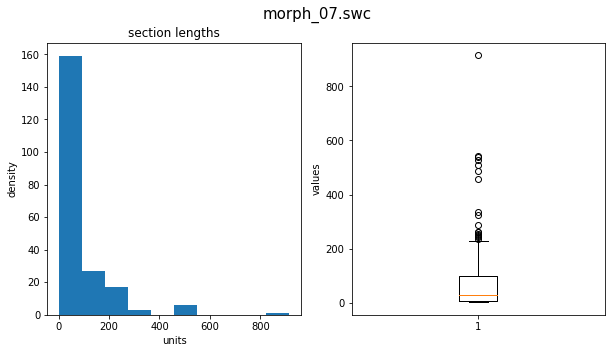

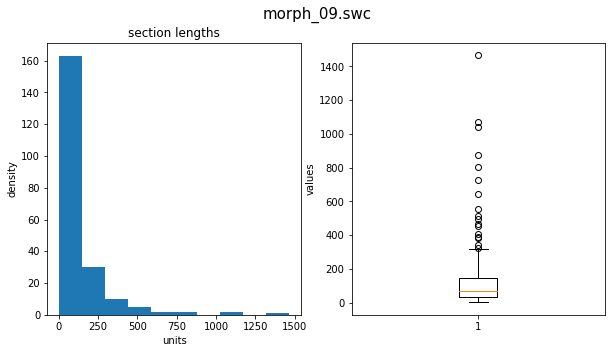

In [102]:
for cell in correct_cells:    
    neuron = nm.load_morphology("data/" + cell)
    feature = "section_lengths"
    values = nm.get(feature, neuron)

    hist_and_boxplot(neuron, values);